In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('dataset w7.csv')
data

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


### Carying out descriptive analysis of the data

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Count of males/females in the dataset')

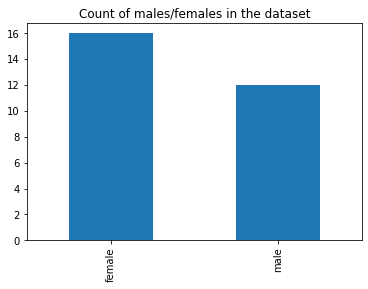

In [99]:
data['Gender'].value_counts().plot.bar()
plt.title('Count of males/females in the dataset')

In [105]:
data1=data.groupby(data['Test preparation']).mean()

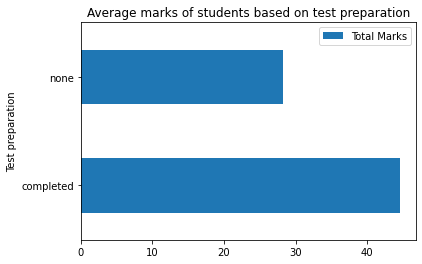

In [117]:
data1.plot.barh(title='Average marks of students based on test preparation')
plt.show(block='True')

From the above graph we can see that the count of females is higher than that of males.
Test preparation completed students got  higher average marks compared to students who haven't prepared.

In [91]:
data.groupby('Gender').describe()

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

In [64]:
print(data.groupby('Gender').var())

        Total Marks
Gender             
female   165.533333
male     148.083333


Eventhough there are more female students, mean score of male students are less than that of females.There is not 
much difference in standard deviation of both genders,but female students show greater variance in their marks.


In [66]:
print(data.groupby('Test preparation').var())

                  Total Marks
Test preparation             
completed           11.285714
none               135.990476


In [92]:
data.groupby('Test preparation').describe()

Total Marks                                                \
                       count       mean        std   min   25%   50%   75%   
Test preparation                                                             
completed                7.0  44.571429   3.359422  40.0  43.0  44.0  46.0   
none                    21.0  28.238095  11.661495  12.0  18.0  27.0  38.0   

                        
                   max  
Test preparation        
completed         50.0  
none              48.0

We can see a decrease in average marks of students who haven't completed the test preparation and the completed students 
show lesser variance in total marks which shows their consistency in scoring.


#### The simplest way to compare two distribution is by comparing their means via  independant  two sample t test.

H0:Male and female mean scores are equal.    
Ha:Male and Female score means are not equal

In [77]:
f=data[data['Gender']=='female']
m=data[data['Gender']=='male']

In [79]:
from scipy.stats import ttest_ind
alpha=0.05
ttest_ind(f['Total Marks'],m['Total Marks'])

Ttest_indResult(statistic=0.6940885268848668, pvalue=0.4937822317960763)

pvalue > alpha, hence we fail to reject the null hypothesis.  
conclusion:Male and female students scored the same marks

#### Here we use  two sample t test to  check whether test preparation helps the students

H0:The average of testpreparation completed students and not completed students are equal.  
Ha:The  average of the two groups are not equal

In [89]:
dtc=data[data['Test preparation']=='completed']
dtn=data[data['Test preparation']=='none']

In [90]:
from scipy.stats import ttest_ind
alpha=0.05
ttest_ind(dtc['Total Marks'],dtn['Total Marks'])

Ttest_indResult(statistic=3.6143637527769217, pvalue=0.0012671292457320106)

Here pvalue< alpha hence we reject null hypothesis.The average of the two groups are not equal.   
conclusion:The test preparation helps the students.